# Лабораторная работа №2

ФИО:    Касрадзе Джаамал Зурабович   
Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [11]:
import pandas as pd
data = pd.read_csv('~/uni/ИНН/L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
195000000,Brokered by Serhant,Condo for sale,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
260000,Brokered by Sowae Corp,House for sale,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
55000000,Brokered by Sotheby's International Realty - E...,Townhouse for sale,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599000,Brokered by COMPASS,Co-op for sale,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
245000,Brokered by Mjr Real Estate Llc,Co-op for sale,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
1275000,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398


## 2. Описание постановки задачи
Требуется найти зависимость цены квартиры в Нью-Йорке от её параметров. Цена - непрерывный парметр. 

Имеющиеся данные о квартирах:
* Имя брокера
* Тип
* Цена
* Спальни
* Ванные
* Площадь
* Полный адрес
* Состояние
* Основной адрес
* Административная площадь, уровень 2 (округа и независимые города): информация
* Местность
* Под-местность
* Название улицы
* Длинное название
* Форматированный адрес
* Долгота
* Широта

## 3. Распределение целевой переменной
У данных довольно большой разброс, но в целом большая часть квартир cтоит меньше одного миллиона. Медиана меньше среднего значения в три раза. Несмотря на своё меньшенство, квартиры стоящие больше одного миллиона в сумме превосходят сумму стоимостей квартир до одного миллиона. Количество значений переменной равно количеству строк в базе данных - 4801.

<Axes: >

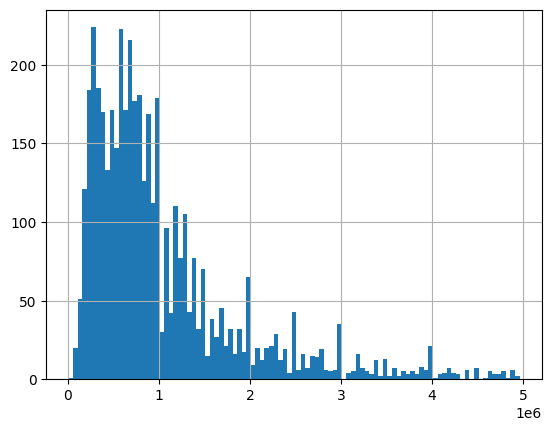

In [12]:
prices = list(data["PRICE"]).sort()
data["PRICE"].hist(bins=[i for i in range(10000, 5000000, 50000)])

## 4. Основные статистики

In [13]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,1.909849e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,4.928671e+06,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,1.950000e+08,50.000000,50.000000,65535.000000,40.912729,-73.702450


## 5. Основная информация о датасете

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## 6. Пропуски в данных
Пропусков в датасете нет, но я должен отметить что одна из квартир стоила 2**31 - 1, что является максимальным значением 32-х битной переменной со знаком. Это значение я заменил одним миллионом, что примерно равно медианному значению стоимостей квартир.

## 7. Гистограммы
Как и в случае с ценами, разброс в количестве спален и и ванных очень велик, медиана в районе 3, а максимум равен 50.

<Axes: >

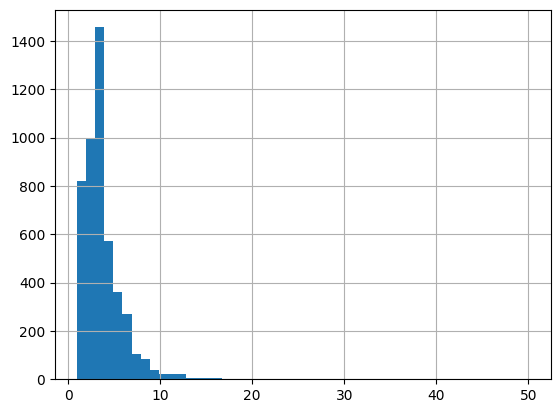

In [15]:
data["BEDS"].hist(bins=50)

<Axes: >

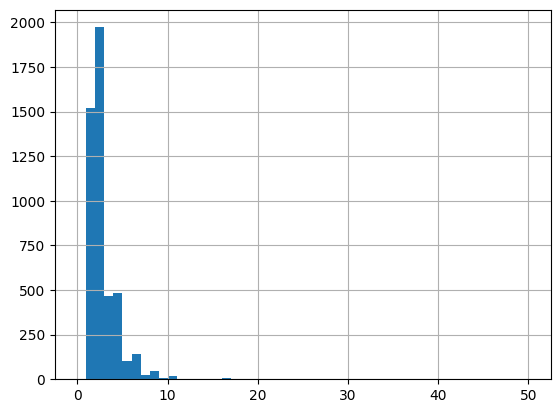

In [16]:
data["BATH"].hist(bins=50)

Т.к. максимальное значение площади равно 6000, пришлось изменить вид bin'ов. В целом всё как и прежде, за исключением аномельного пика в 1600 мест с площадью ~2100ft<sup>2</sup>

<Axes: >

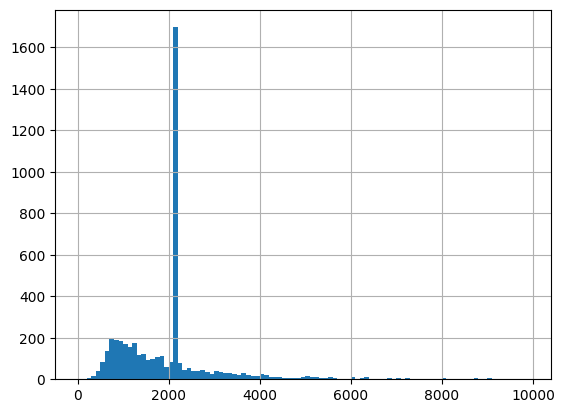

In [17]:
data["PROPERTYSQFT"].hist(bins=[i for i in range(0, 10000, 100)])

Среди типов популярнее всего кондо, квартиры, таунхаусы и коммуналки для продажи.

<Axes: >

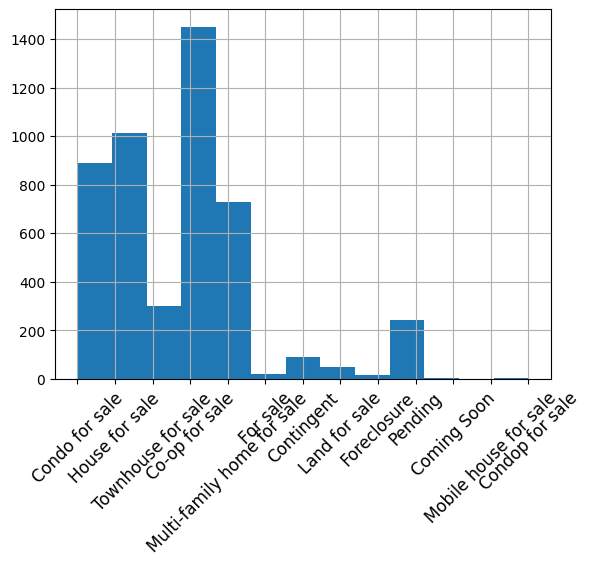

In [18]:
data["TYPE"].hist(bins=13, xlabelsize=12, xrot=45)

Не знаю как это интерпретировать, выглядит неоднородно.

<Axes: >

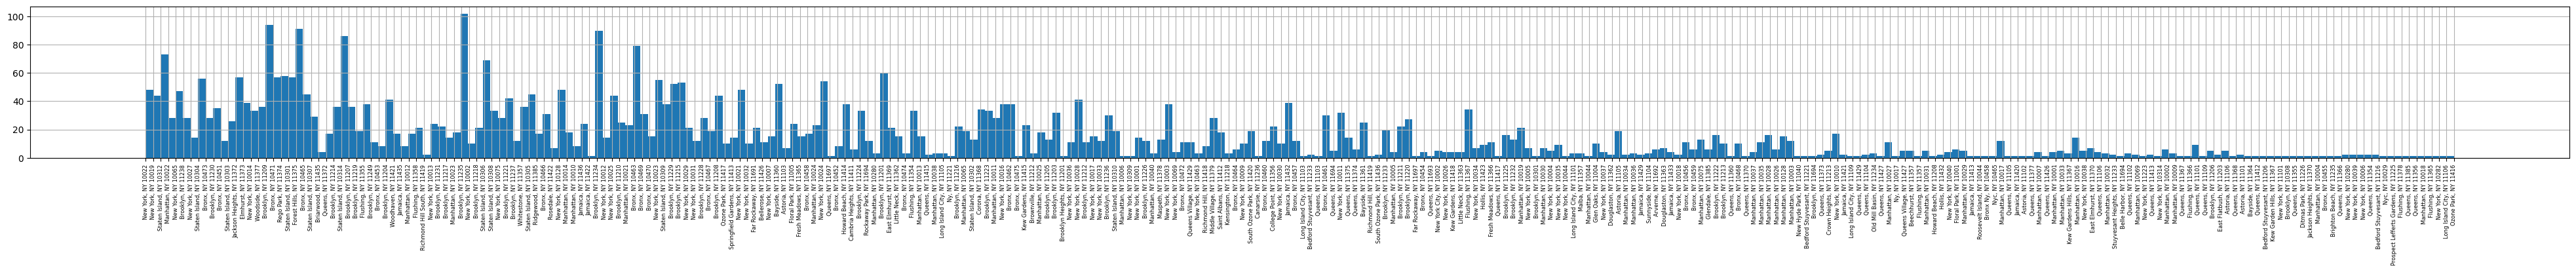

In [19]:
data["STATE"].hist(bins=308, xlabelsize=6, xrot=90, figsize=(50, 3))

## 8. Зависимость переменных от целевой

<Axes: xlabel='[PRICE]', ylabel='[BATH]'>

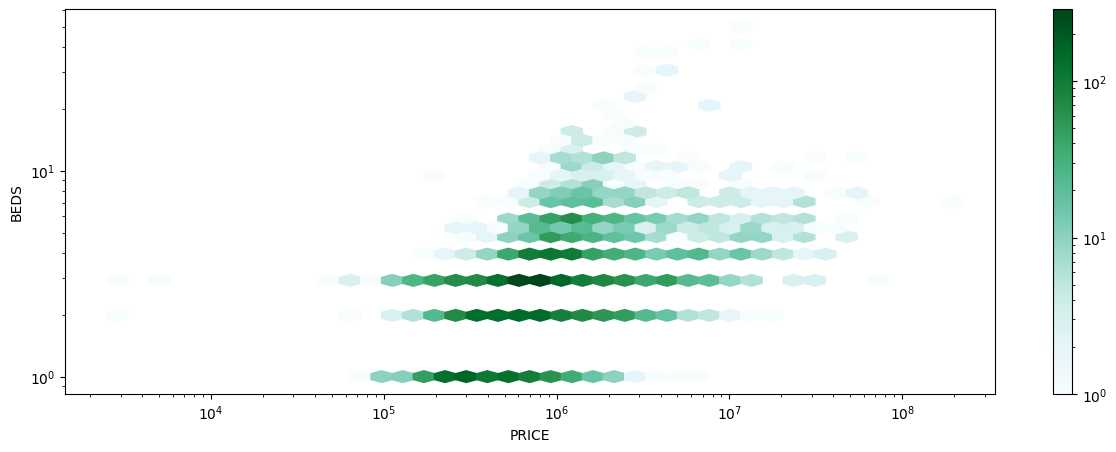

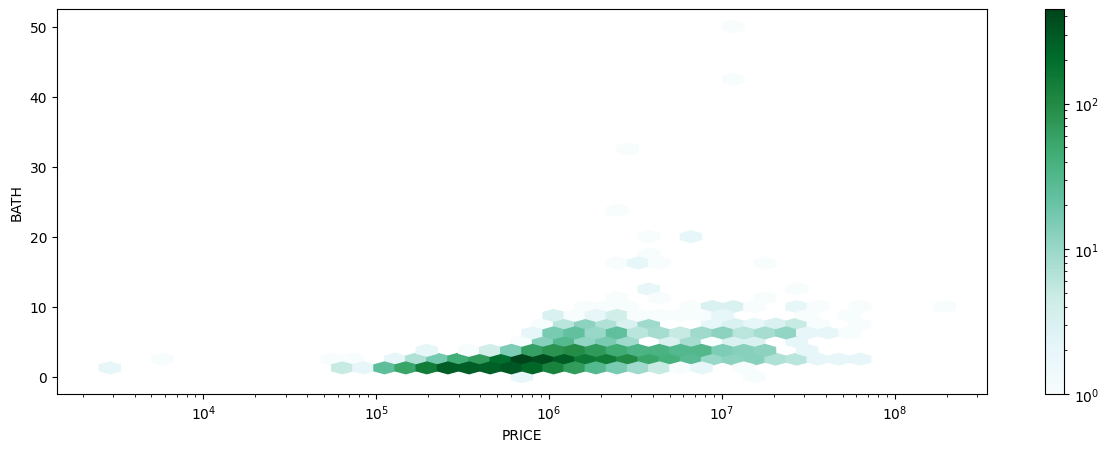

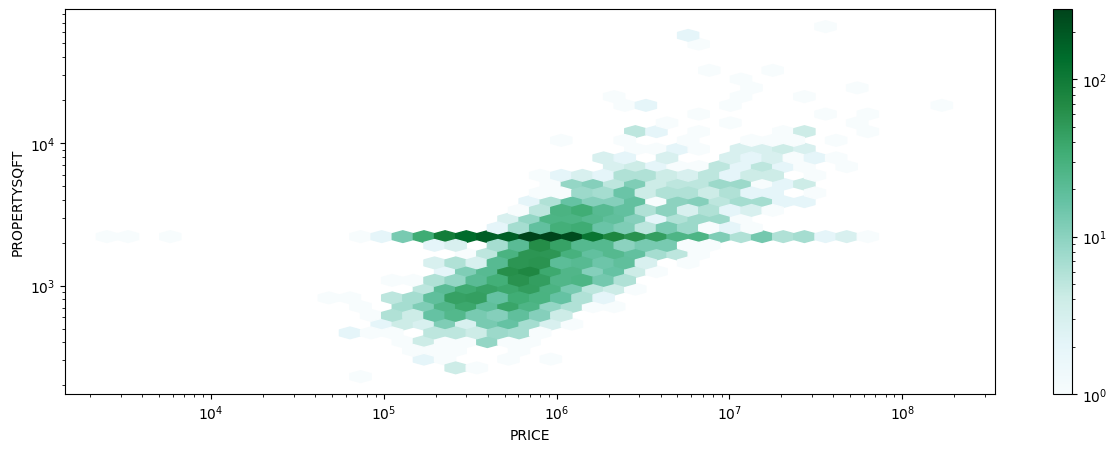

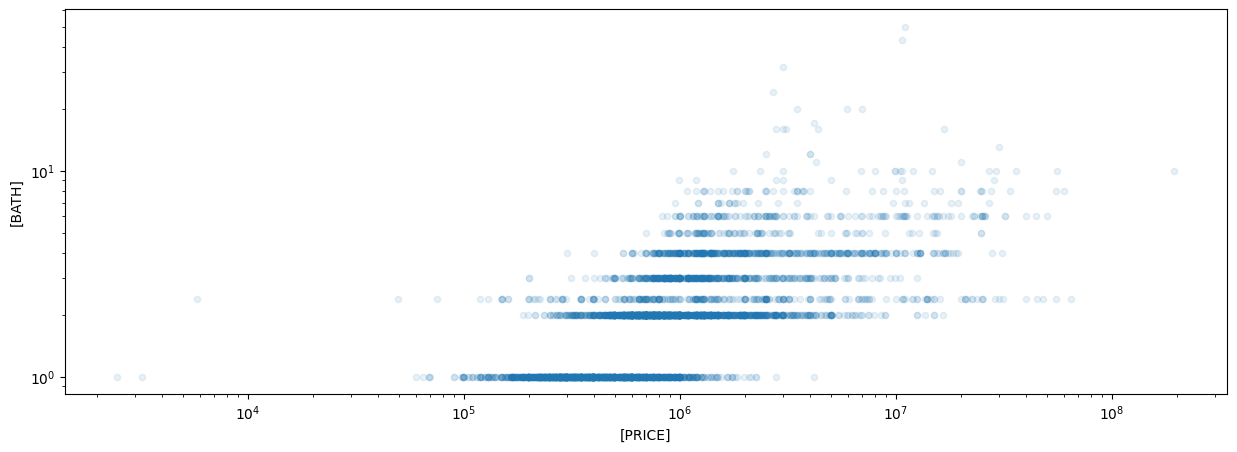

In [69]:
import matplotlib.pyplot as plt
import numpy as np
data_sorted = data.sort_values(by="PRICE")
for i in range(len(data_sorted["BATH"])):
    break
    data_sorted[i] = max(data_sorted[i], 1)
data_sorted.plot.hexbin(x="PRICE", y="BEDS", xscale='log', yscale='log', alpha=1, figsize=(15, 5), gridsize=(40, 20), bins='log')
data_sorted.plot.hexbin(x="PRICE", y="BATH", xscale='log', yscale='symlog', alpha=1, figsize=(15, 5), gridsize=(40, 20), bins='log')
data_sorted.plot.hexbin(x="PRICE", y="PROPERTYSQFT", xscale='log', yscale='log', alpha=1, figsize=(15, 5), gridsize=(40, 20), bins='log')
data_sorted.plot.scatter(x=["PRICE"], y=["BATH"], logx=True, logy=True, alpha=.1, figsize=(15, 5))

Из графиков видно, что количество ванных  и спален возрастает с ценой, как и площадь. Но площадь, по какой-то причиние, имеет огромное количество значений в примерно 1100, почти на всём спектре цен.

## 9. Мульти график

In [ ]:
downlim = 250
uplim = 250
x = data_sorted["PRICE"].to_numpy()[downlim:-uplim]
beds = data_sorted["BEDS"].to_numpy()[downlim:-uplim]
bath = data_sorted["BATH"].to_numpy()[downlim:-uplim]
psf = data_sorted["PROPERTYSQFT"].to_numpy()[downlim:-uplim] * .001
fig, ax = plt.subplots()
ax.scatter(x, beds, c="red", label="Beds", alpha=.1)
ax.scatter(x, bath, c="blue", label="Bath", alpha=.1)
#ax.scatter(x, psf, c="green", label="SQFTx1000", alpha=.3)
ax.legend()
plt.show()